In [37]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../')
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer
)
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import itertools
matplotlib.style.use('ggplot')
%matplotlib inline

In [36]:
def get_base_predictions(trainer):
    base_predictions = []
    default_rating = trainer.y_train['rating_ranking'].mode()[0]
    
    for index, row in trainer.test_df.iterrows():
        prev_rating = row['prev_rating_ranking']
        if pd.isnull(prev_rating):
            base_predictions.append(default_rating)
        else:
            base_predictions.append(prev_rating)

    return base_predictions

In [2]:
original_features_df = pd.read_csv("../../../../data/credit_rating/intermediate_data/credit_rating_features_0.csv")

In [3]:
trainer = RatingModelTrainer(original_features_df)

In [4]:
trainer.make_dev_and_test_df(threshold_year=2005)

In [14]:
trainer.y_train['rating_ranking'].mode()[0]

14

In [20]:
trainer.test_df.head()

,Unnamed: 0,GVKEY,datadate_x,conm,year,month,CASHMTA_win,EXRET_AVG_win,MB_win,NIMTA_AVG_win,...,RSIZE_win,SIGMA_win,TLMTA_win,is_bankrupt,dldte,deletion_year,deletion_month,prev_rating_ranking,rating_ranking,issuer_rating
224,224,1004,2006-01-31,AAR CORP,2006,1,0.018275,0.054161,1.881755,0.011882,...,-9.585569,0.090328,0.372484,False,NaN,NaN,NaN,13.0,13,BB-
225,225,1004,2006-02-28,AAR CORP,2006,2,0.018193,0.063971,1.890178,0.011898,...,-9.600040,0.082911,0.370809,False,NaN,NaN,NaN,13.0,13,BB-
226,226,1004,2006-03-31,AAR CORP,2006,3,0.017508,0.053289,1.961517,0.012025,...,-9.542309,0.069334,0.356864,False,NaN,NaN,NaN,13.0,13,BB-
227,227,1004,2006-04-30,AAR CORP,2006,4,0.066330,0.056316,1.984688,0.012307,...,-9.353849,0.069627,0.344869,False,NaN,NaN,NaN,13.0,13,BB-
228,228,1004,2006-05-31,AAR CORP,2006,5,0.069059,0.063971,1.910726,0.012822,...,-9.430279,0.067359,0.359057,False,NaN,NaN,NaN,13.0,13,BB-


In [30]:
base_predictions = get_base_predictions(trainer)

In [38]:
trainer.y_pred_bin = base_predictions

In [39]:
print("F1 Score")
print(f1_score(trainer.y_test, trainer.y_pred_bin, average='macro'))

F1 Score
0.938683136569


In [40]:
print("F1 Score")
print(f1_score(trainer.y_test, trainer.y_pred_bin, average='weighted'))

F1 Score
0.969790423559


In [41]:
print("Detailed classification report:")
print(classification_report(trainer.y_test, trainer.y_pred_bin))

Detailed classification report:
             precision    recall  f1-score   support

          1       0.99      1.00      1.00       684
          2       0.98      0.99      0.98       210
          3       0.99      0.99      0.99      1370
          4       0.99      0.98      0.99      1868
          5       0.99      0.99      0.99      3556
          6       0.99      0.99      0.99      7019
          7       0.98      0.98      0.98      7694
          8       0.98      0.98      0.98     11592
          9       0.98      0.98      0.98     16349
         10       0.98      0.98      0.98     12841
         11       0.97      0.97      0.97      9378
         12       0.97      0.97      0.97     13052
         13       0.97      0.97      0.97     15938
         14       0.93      0.97      0.95     13890
         15       0.96      0.95      0.96     11467
         16       0.95      0.94      0.95      5534
         17       0.91      0.89      0.90      1543
         18  

Confusion matrix, without normalization
[[  683     0     0     0     0     0     0     0     0     0     0     0
      0     1     0     0     0     0     0     0     0]
 [    1   207     1     0     0     0     0     0     0     0     0     0
      0     1     0     0     0     0     0     0     0]
 [    2     4  1358     5     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    2     1    11  1834    13     0     1     0     0     1     0     0
      1     3     1     0     0     0     0     0     0]
 [    0     0     3    12  3517    20     1     1     0     0     0     0
      0     2     0     0     0     0     0     0     0]
 [    0     0     1     1    27  6942    37     4     1     0     0     0
      1     5     0     0     0     0     0     0     0]
 [    0     0     0     0     4    52  7551    70     7     0     0     0
      0    10     0     0     0     0     0     0     0]
 [    0     0     0     0     3    11    81

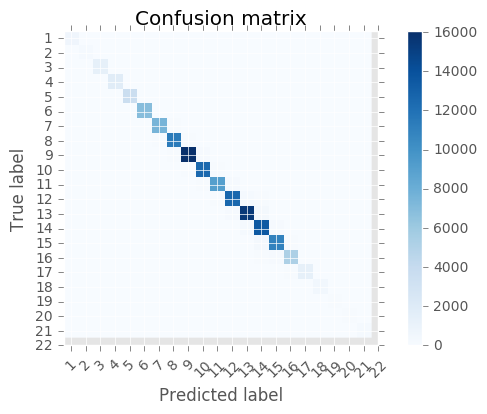

In [49]:
classes = [x for x in range(1, 23)]

cm = confusion_matrix(trainer.y_test, trainer.y_pred_bin)
cmap = plt.cm.Blues

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

print('Confusion matrix, without normalization')
print(cm)

# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, cm[i, j],
#          horizontalalignment="center",
#          color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [45]:
print_full(pd.DataFrame(cm))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,683,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,207,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,4,1358,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,11,1834,13,0,1,0,0,1,0,0,1,3,1,0,0,0,0,0,0
4,0,0,3,12,3517,20,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0
5,0,0,1,1,27,6942,37,4,1,0,0,0,1,5,0,0,0,0,0,0,0
6,0,0,0,0,4,52,7551,70,7,0,0,0,0,10,0,0,0,0,0,0,0
7,0,0,0,0,3,11,81,11351,113,9,1,0,1,21,1,0,0,0,0,0,0
8,0,0,0,0,0,3,18,104,16039,137,10,1,2,35,0,0,0,0,0,0,0
9,0,0,0,0,0,0,3,22,118,12540,101,10,0,47,0,0,0,0,0,0,0


In [48]:
trainer.y_test[trainer.y_test['rating_ranking'] == 22]

,rating_ranking
1102,22
1103,22
1104,22
5844,22
26588,22
39133,22
52767,22
54389,22
60528,22
60529,22
